## 02a_temporalOutlinksHeatmap
Take in the outlink temporal inclusion dataframes and create clustered heatmaps based on temporal inclusion

import:

    00_outlinkInclusiondf_en.pkl
    00_outlinkInclusiondf_ar.pkl
    
output:
    pngs of the heatmaps in '02_Visuals'
    ar_100_199_outlinkHeatmap.png
    ar_100_199_spatialOutlinkHeatmap.png
    ar_spatialOutlinkHeatmap_Cluster.png
    ar_tot_spatialOutlinkHeatmap.png
    en_100_199_outlinkHeatmap.png
    en_100_199_spatialOutlinkHeatmap.png
    en_spatialOutlinkHeatmap_Cluster.png
    en_tot_spatialOutlinkHeatmap.png
    

The Plan:
- get temporal inclusion dataframes
- plot a heatmap of a subsection of the data
- find the pairwise distances of their temporal inclusion
- plot a subection of these pairwise distances
- plot all of the pairwise distances
- cluster the outlinks by their pairwise distancs

    
Plan
1. English
2. Arabic

In [1]:
#import necessary items

import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd

#for heatmap
import seaborn as sns

#for pairwise distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

## 1. English

In [2]:
#import the data

#get data
with open('../Data/00_outlinkInclusiondf_en.pkl', 'rb') as f:
    en_data = pickle.load(f)

In [3]:
#visual
en_data

timestamp                            2011-01-31  2011-02-28  2011-03-31  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           1   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           1   
Zine El Abidine Ben Ali                       0           1           1   
Zouérat                                       0           0           0   

timestamp                            2011-04-30  2011-05-31  2011-06-30  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           0   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           0   
Zine El Abidine Ben Ali                       1           1           1   
Zouérat                                       1           1           1   

timestamp                            2011-07-31  2011-08-31  2011-09-30  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           0   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           0   
Zine El Abidine Ben Ali                       1           1           1   
Zouérat                                       1           1           1   

timestamp                            2011-10-31  ...  2023-09-30  2023-10-31  \
15 October 2011 global protests               0  ...           0           0   
17 October Revolution                         0  ...           1           1   
2000s energy crisis                           0  ...           0           0   
2004–05 Palestinian local elections           0  ...           0           0   
2005 Ahvaz unrest                             0  ...           0           0   
...                                         ...  ...         ...         ...   
Zaydism                                       0  ...           1           1   
Zeynep Tufekci                                0  ...           1           1   
Zimbabwe                                      0  ...           0           0   
Zine El Abidine Ben Ali                       1  ...           1           1   
Zouérat                                       1  ...           0           0   

timestamp                            2023-11-30  2023-12-31  2024-01-31  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         1           1           1   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections 

### 1a. Create Subsection Heatmap

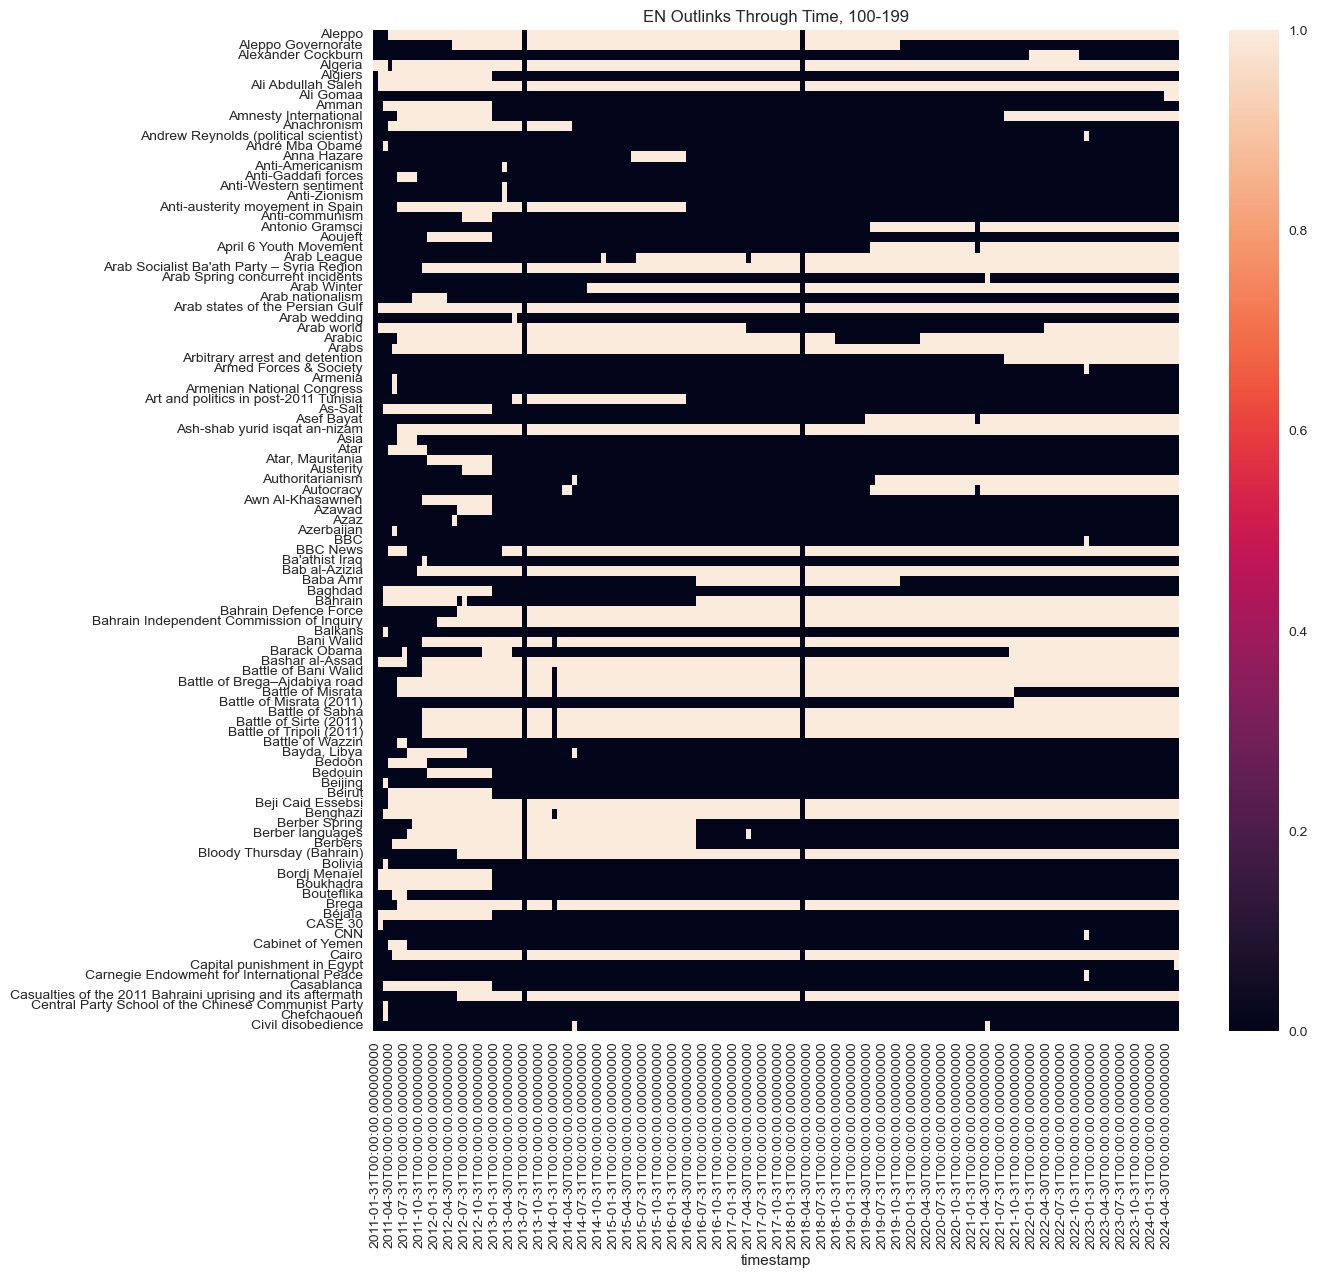

In [4]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.style.use("seaborn")

plt.figure(figsize = (13,13))
heat_map = sns.heatmap(en_data.iloc[100:199], yticklabels = True) #first 100 columns
plt.title("EN Outlinks Through Time, 100-199")
plt.savefig('02_Visuals/en_100_199_outlinkHeatmap.png')

plt.show()

### 1b. Identify Pairwise Distances

In [5]:
#https://drawingfromdata.com/pandas/clustering/making-a-pairwise-distance-matrix-in-pandas.html

squareform(pdist(en_data.loc[:]))
pairDf_en = 1 - pd.DataFrame( squareform(pdist(en_data.loc[:], metric='cosine')),
    columns = en_data.index,
    index = en_data.index
)

In [6]:
pairDf_en.head()

15 October 2011 global protests  \
15 October 2011 global protests                               1.0000   
17 October Revolution                                         0.0000   
2000s energy crisis                                           0.0000   
2004–05 Palestinian local elections                           0.0000   
2005 Ahvaz unrest                                             0.3669   

                                     17 October Revolution  \
15 October 2011 global protests                        0.0   
17 October Revolution                                  1.0   
2000s energy crisis                                    0.0   
2004–05 Palestinian local elections                    0.0   
2005 Ahvaz unrest                                      0.0   

                                     2000s energy crisis  \
15 October 2011 global protests                      0.0   
17 October Revolution                                0.0   
2000s energy crisis                                  1.0   
2004–05 Palestinian local elections                  0.0   
2005 Ahvaz unrest                                    0.0   

                                     2004–05 Palestinian local elections  \
15 October 2011 global protests                                      0.0   
17 October Revolution                                                0.0   
2000s energy crisis                                                  0.0   
2004–05 Palestinian local elections                                  1.0   
2005 Ahvaz unrest                                                    0.0   

                                     2005 Ahvaz unrest  \
15 October 2011 global protests                 0.3669   
17 October Revolution                           0.0000   
2000s energy crisis                             0.0000   
2004–05 Palestinian local elections             0.0000   
2005 Ahvaz unrest                               1.0000   

                                     2005 Palestinian presidential election  \
15 October 2011 global protests                                         0.0   
17 October Revolution                                                   0.0   
2000s energy crisis                                                     0.0   
2004–05 Palestinian local elections                                     1.0   
2005 Ahvaz unrest                                                       0.0   

                                     2006 Palestinian legislative election  \
15 October 2011 global protests                                        0.0   
17 October Revolution                                                  0.0   
2000s energy crisis                                                    0.0   
2004–05 Palestinian local elections                                    1.0   
2005 Ahvaz unrest                                                      0.0   

                                     2007–2008 world food price crisis  \
15 October 2011 global protests                               0.661143   
17 October Revolution                                         0.000000   
2000s energy crisis                                           0.000000   
2004–05 Palestinian local elections                           0.164399   
2005 Ahvaz unrest                                             0.434959   

                                     2008 Armenian presidential election  \
15 October 2011 global protests                                      0.0   
17 October Revolution                                                0.0   
2000s energy crisis                                                  0.0   
2004–05 Palestinian local elections                                  0.0   
2005 Ahvaz unrest                                                    0.0   

                                     2009 Iranian presidential election protests  \
15 October 2011 global protests                                         0.930949   
17 October Revolution                             

In [7]:
#save data
with open('../Data/02b_cosineLinks_en.pkl', 'wb') as f:
    pickle.dump(pairDf_en, f)

<function matplotlib.pyplot.show(close=None, block=None)>

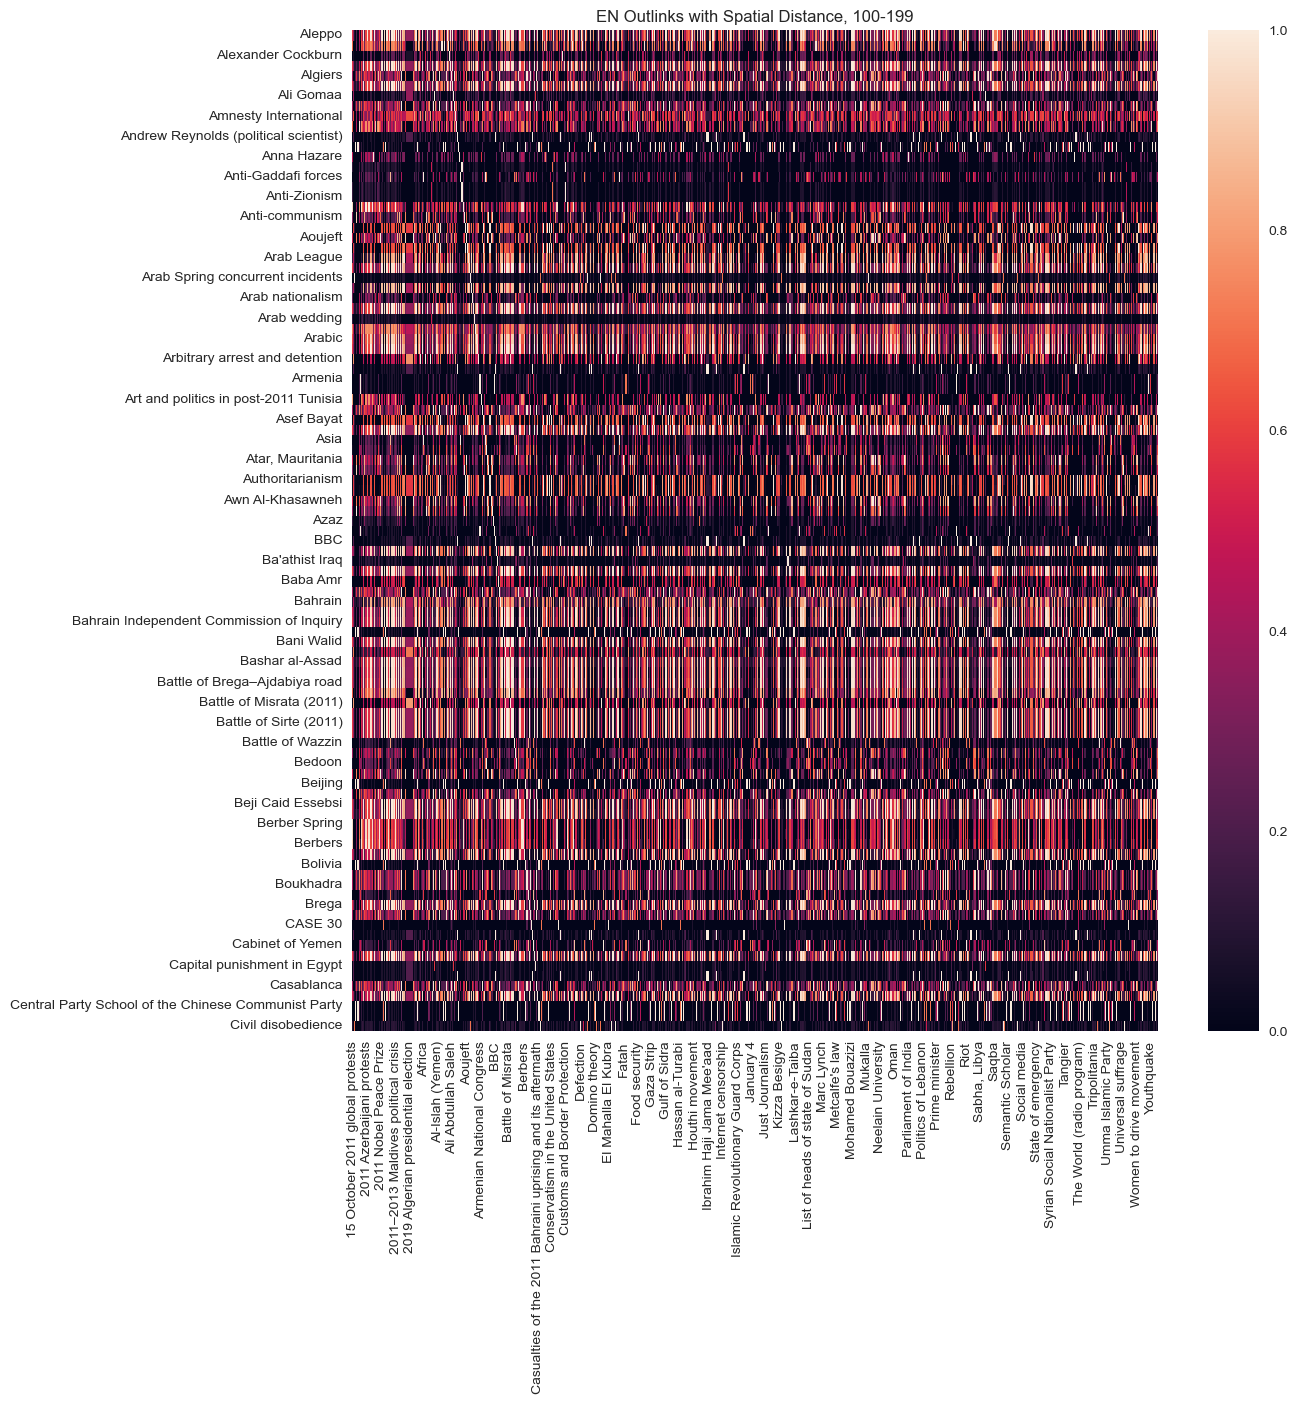

In [8]:
#plot the pairwise distances of all of the outlinks for a subsection

plt.figure(figsize=(13,13))
heat_map = sns.heatmap(pairDf_en[100:199])

plt.title('EN Outlinks with Spatial Distance, 100-199')
plt.savefig('02_Visuals/en_100_199_spatialOutlinkHeatmap.png')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

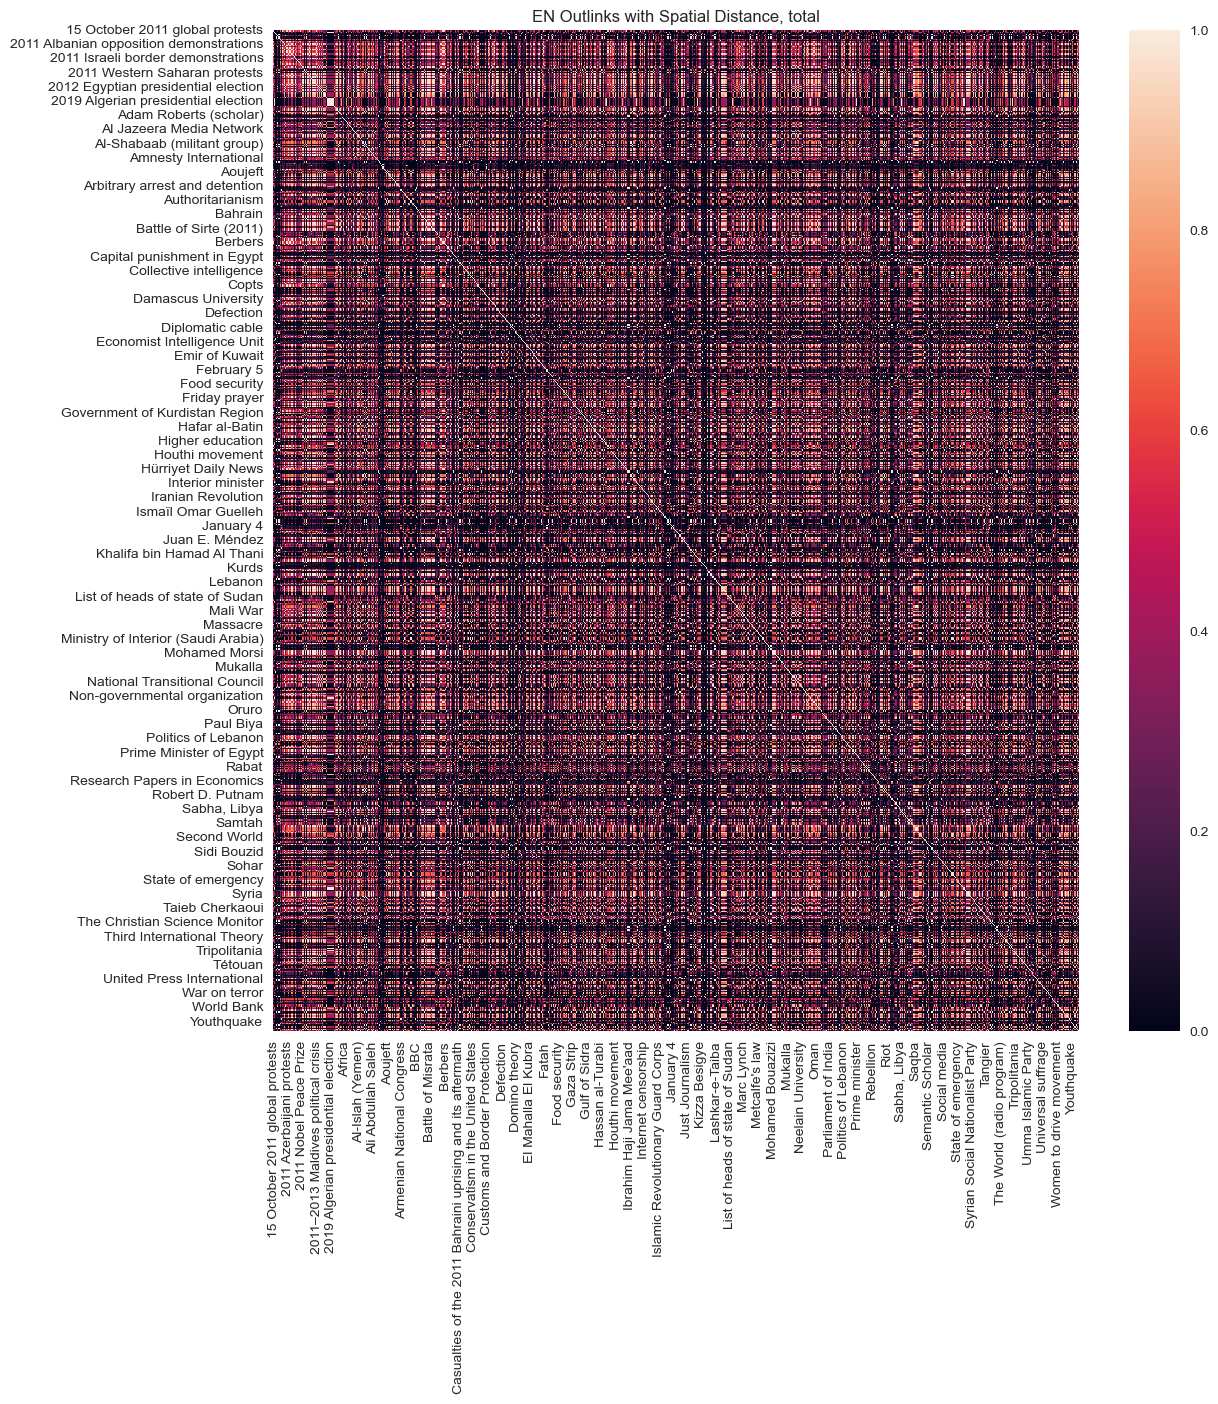

In [9]:
#plot the pairwise distances of all of the outlinks
plt.figure(figsize=(13,13))
heat_map = sns.heatmap(pairDf_en)

plt.title('EN Outlinks with Spatial Distance, total')
plt.savefig('02_Visuals/en_tot_spatialOutlinkHeatmap.png')

plt.show

### 1c. Cluster The Outlinks by Pairwise Similarity 

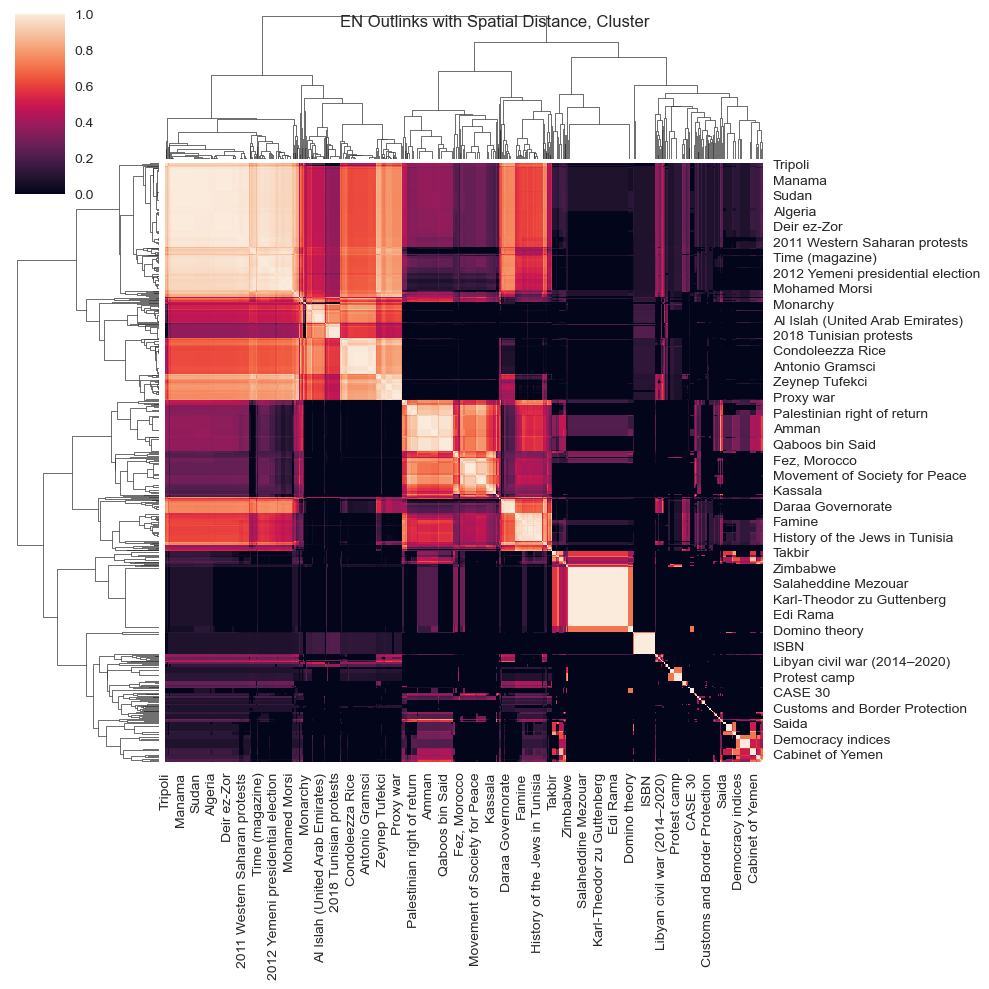

In [10]:
#https://seaborn.pydata.org/generated/seaborn.clustermap.html

clusterPlt = sns.clustermap(pairDf_en)
clusterPlt.fig.suptitle("EN Outlinks with Spatial Distance, Cluster")
plt.savefig('02_Visuals/en_spatialOutlinkHeatmap_Cluster.png')
clusterPlt


## 2. Arabic

In [11]:
#get data
with open('../Data/00_outlinkInclusiondf_ar.pkl', 'rb') as f:
    ar_data = pickle.load(f)

In [12]:
ar_data

timestamp                                     2011-02-28  2011-03-31  \
1 أغسطس                                                0           0   
1 فبراير                                               0           1   
11 فبراير                                              0           1   
12 مايو                                                0           0   
13 أبريل                                               0           0   
...                                                  ...         ...   
وكالة رويترز                                           0           0   
ويكيبيديا:بحاجة لمصدر                                  0           0   
ويكيبيديا:دليل الأسلوب/تجنب التعابير المبهمة           0           0   
ويكيليكس                                               0           0   
يوتيوب                                                 0           1   

timestamp                                     2011-04-30  2011-05-31  \
1 أغسطس                                                0           0   
1 فبراير                                               0           0   
11 فبراير                                              1           1   
12 مايو                                                0           0   
13 أبريل                                               0           0   
...                                                  ...         ...   
وكالة رويترز                                           0           0   
ويكيبيديا:بحاجة لمصدر                                  0           0   
ويكيبيديا:دليل الأسلوب/تجنب التعابير المبهمة           0           0   
ويكيليكس                                               1           1   
يوتيوب                                                 1           1   

timestamp                                     2011-06-30  2011-07-31  \
1 أغسطس                                                0           0   
1 فبراير                                               0           0   
11 فبراير                                              1           1   
12 مايو                                                1           1   
13 أبريل                                               1           1   
...                                                  ...         ...   
وكالة رويترز                                           0           0   
ويكيبيديا:بحاجة لمصدر                                  1           1   
ويكيبيديا:دليل الأسلوب/تجنب التعابير المبهمة           0           0   
ويكيليكس                                               1           1   
يوتيوب                                                 1           1   

timestamp                                     2011-08-31  2011-09-30  \
1 أغسطس                                                0           0   
1 فبراير                                               0           0   
11 فبراير                                              1           1   
12 مايو                                                1           1   
13 أبريل                                               1           1   
...                                                  ...         ...   
وكالة رويترز                                           0           1   
ويكيبيديا:بحاجة لمصدر                                  1           1   
ويكيبيديا:دليل الأسلوب/تجنب التعابير المبهمة           0           0   
ويكيليكس                                               1           1   
يوتيوب                                                 1           1   

timestamp                                     2011-10-31  2011-11-30  ...  \
1 أغسطس                                                0           0  ...   
1 فبراير                                               0           0  ...   
11 فبراير                                              1           1  ...   
12 مايو                                                1           1  ...   
13 أبريل                                               1           1  ...   
...                                                  ...         ...  ...   
و

### 2a. Create Subsection Heatmap

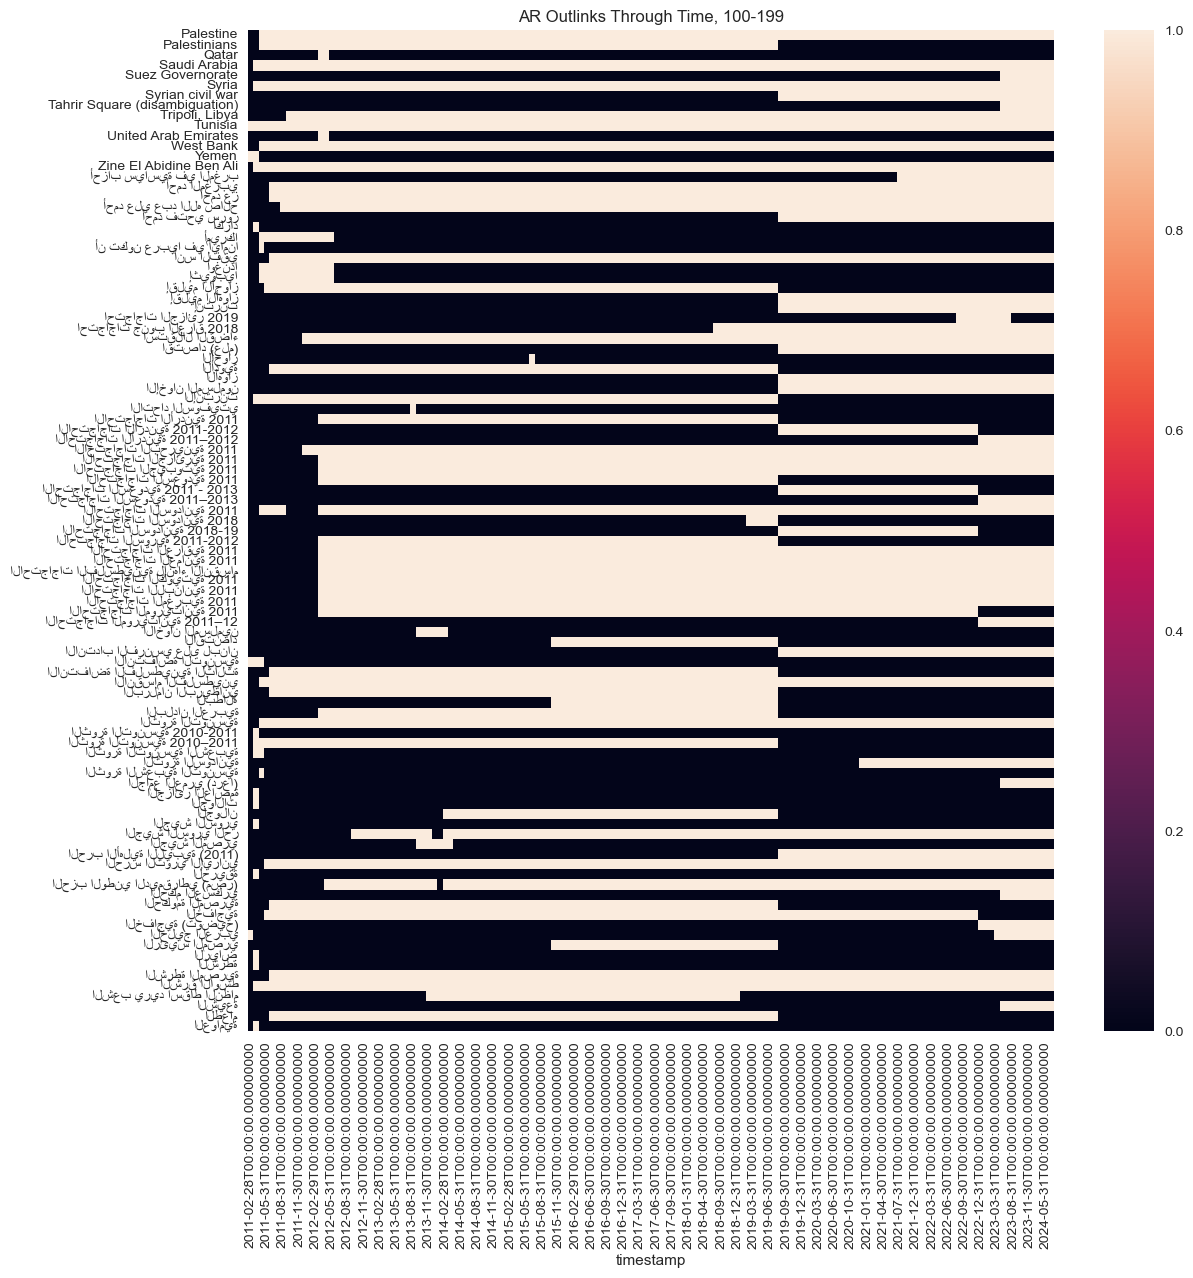

In [13]:
plt.style.use("seaborn")

plt.figure(figsize = (13,13))
heat_map = sns.heatmap(ar_data.iloc[100:199], yticklabels = True)


plt.title("AR Outlinks Through Time, 100-199")
plt.savefig("02_Visuals/ar_100_199_outlinkHeatmap.png")
plt.show()

### 2b. Identify Pairwise Distances

In [14]:
#https://drawingfromdata.com/pandas/clustering/making-a-pairwise-distance-matrix-in-pandas.html

pairDf_ar = 1 - pd.DataFrame( squareform(pdist(ar_data.loc[:], metric='cosine')),
    columns = ar_data.index,
    index = ar_data.index
)

In [15]:
pairDf_ar.head()

1 أغسطس  1 فبراير  11 فبراير   12 مايو  13 أبريل  14 يناير  \
1 أغسطس    1.000000  0.000000   0.442658  0.447214  0.447214  0.442658   
1 فبراير   0.000000  1.000000   0.082199  0.000000  0.000000  0.082199   
11 فبراير  0.442658  0.082199   1.000000  0.989813  0.989813  1.000000   
12 مايو    0.447214  0.000000   0.989813  1.000000  1.000000  0.989813   
13 أبريل   0.447214  0.000000   0.989813  1.000000  1.000000  0.989813   

            1432 هـ   15 آذار  15 أبريل   15 أيار  ...  واشنطن العاصمة  \
1 أغسطس    0.442658  0.000000  0.447214  0.000000  ...        0.587220   
1 فبراير   0.082199  0.000000  0.000000  0.000000  ...        0.000000   
11 فبراير  1.000000  0.805387  0.989813  0.805387  ...        0.259938   
12 مايو    0.989813  0.796725  1.000000  0.796725  ...        0.262613   
13 أبريل   0.989813  0.796725  1.000000  0.796725  ...        0.262613   

           وحدة عربية  وزارة الداخلية  وزارة الداخلية (مصر)  \
1 أغسطس      0.754074        0.000000              0.754074   
1 فبراير     0.000000        1.000000              0.000000   
11 فبراير    0.587022        0.082199              0.587022   
12 مايو      0.593063        0.000000              0.593063   
13 أبريل     0.593063        0.000000              0.593063   

           وزارة الداخلية المصرية  وكالة رويترز  ويكيبيديا:بحاجة لمصدر  \
1 أغسطس                  0.000000      0.000000               0.447214   
1 فبراير                 0.000000      0.000000               0.000000   
11 فبراير                0.796954      0.784133               0.989813   
12 مايو                  0.805156      0.792203               1.000000   
13 أبريل                 0.805156      0.792203               1.000000   

           ويكيبيديا:دليل الأسلوب/تجنب التعابير المبهمة  ويكيليكس    يوتيوب  
1 أغسطس                                        0.000000  0.000000  0.442658  
1 فبراير                                       0.000000  0.000000  0.082199  
11 فبراير                                      0.183804  0.201347  1.000000  
12 مايو                                        0.185695  0.135613  0.989813  
13 أبريل                                       0.185695  0.135613  0.989813  

[5 rows x 402 columns]

In [16]:
#save data
with open('../Data/02b_cosineLinks_ar.pkl', 'wb') as f:
    pickle.dump(pairDf_ar, f)

<function matplotlib.pyplot.show(close=None, block=None)>

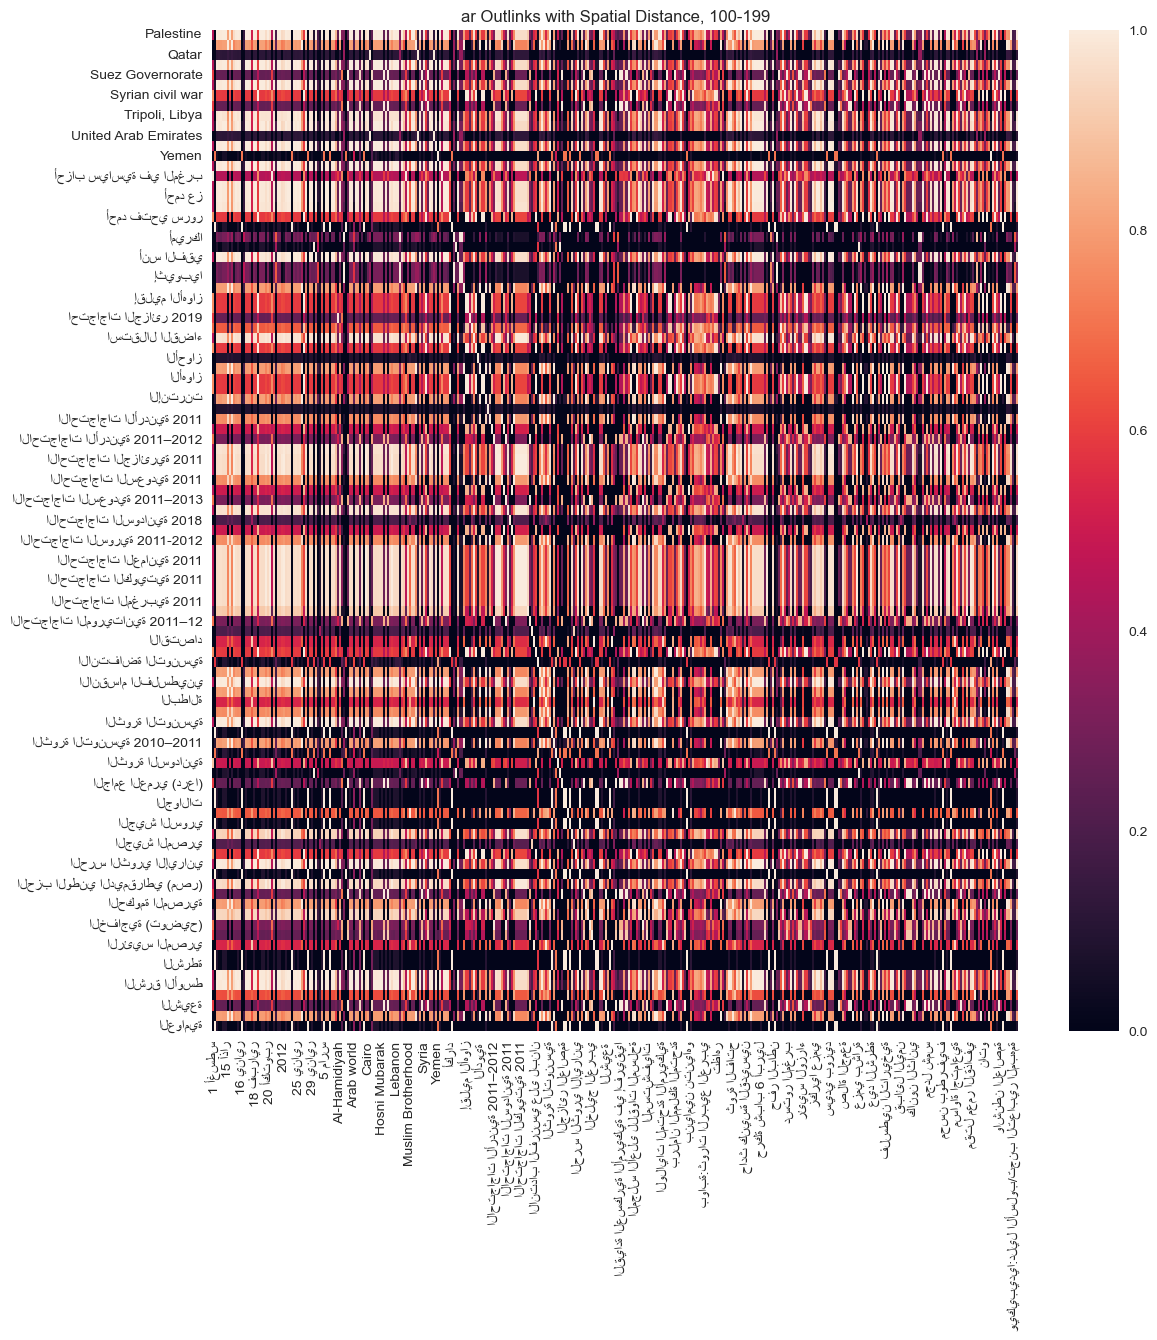

In [17]:
#plot a subsection

plt.figure(figsize=(13,13))
heat_map = sns.heatmap(pairDf_ar[100:199])
plt.title('ar Outlinks with Spatial Distance, 100-199')
plt.savefig('02_Visuals/ar_100_199_spatialOutlinkHeatmap.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

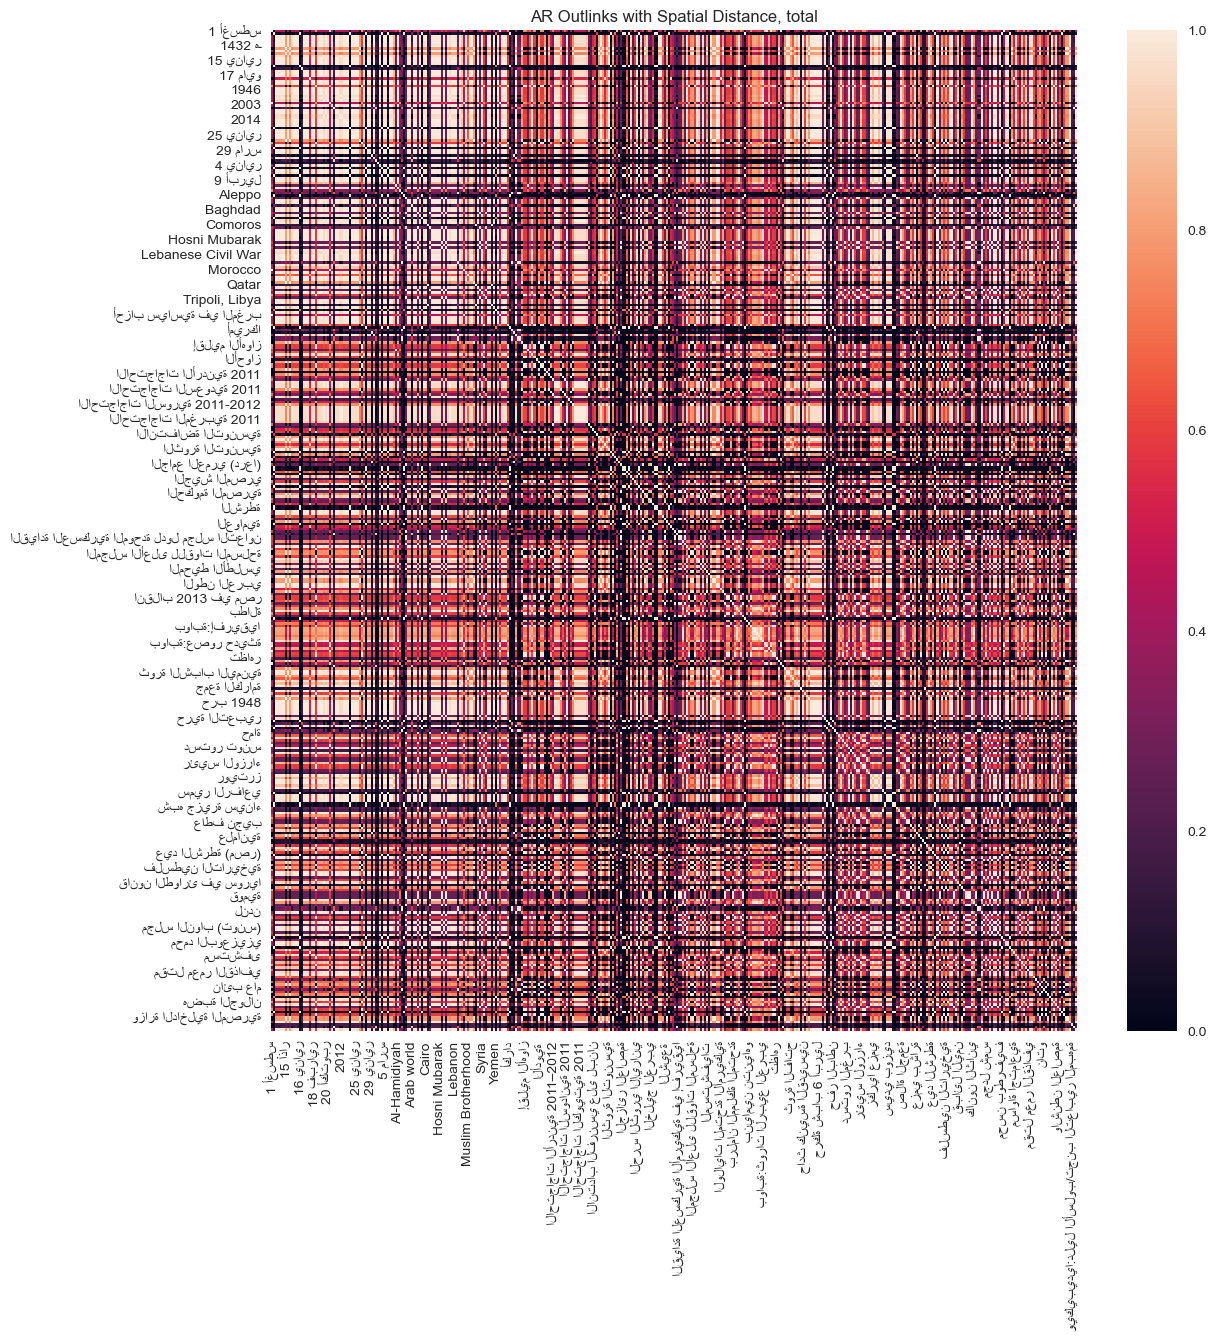

In [18]:
#plot all of the pairwise distances

plt.figure(figsize=(13,13))
heat_map = sns.heatmap(pairDf_ar)
plt.title('AR Outlinks with Spatial Distance, total')
plt.savefig('02_Visuals/ar_tot_spatialOutlinkHeatmap.png')
plt.show

### 2c. Cluster The Outlinks by Pairwise Similarity 

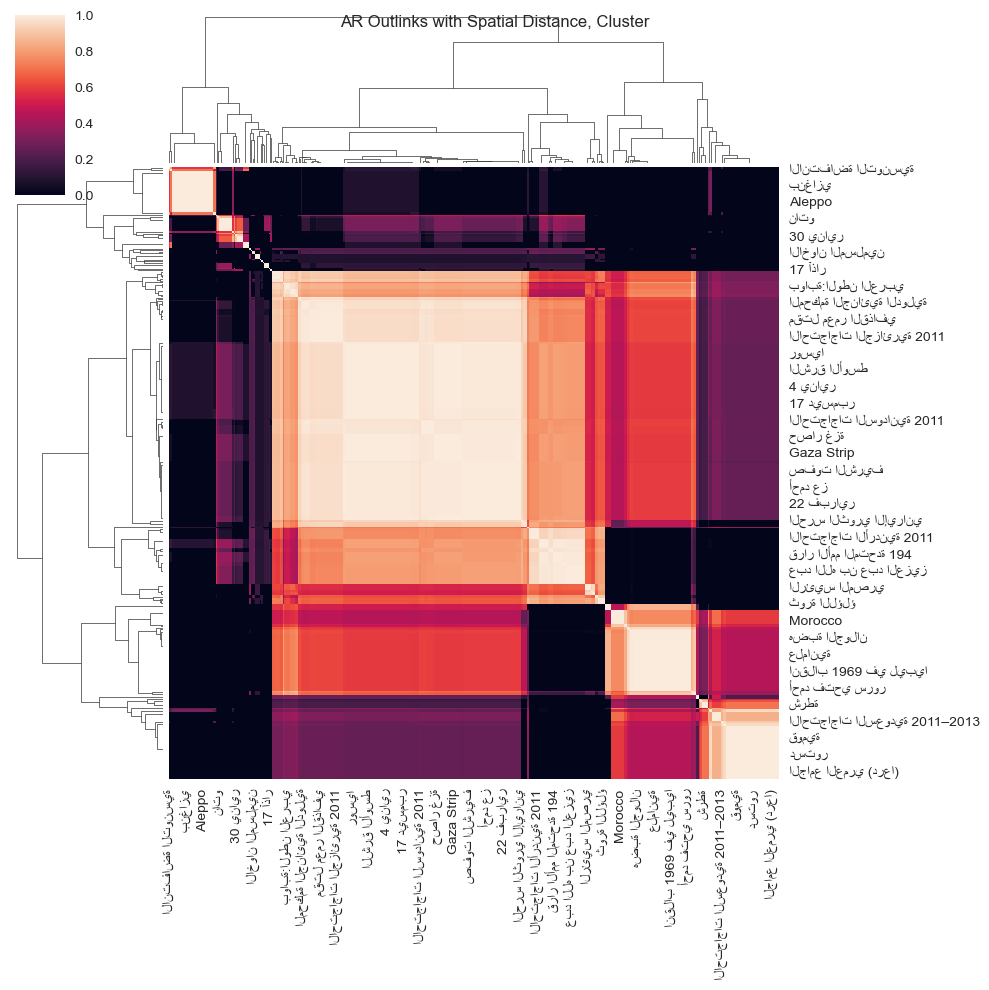

In [19]:
#cluster all of the outlinks by their pairwise similarity

ar_clusterPlt = sns.clustermap(pairDf_ar)
ar_clusterPlt.fig.suptitle("AR Outlinks with Spatial Distance, Cluster")
ar_clusterPlt.savefig('02_Visuals/ar_spatialOutlinkHeatmap_Cluster.png')
ar_clusterPlt
